<a href="https://colab.research.google.com/github/Vennajaya/1/blob/main/women_diabetics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_csv("Diabetes.csv")
print(df.head())
print(df.info())
print(df.describe())


   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null 

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Replace 0 values with NaN for certain columns
cols_to_replace = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Fill NaN values with median (since median is less affected by outliers)
df.fillna(df.median(), inplace=True)

# Selecting only relevant features for clustering
features = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Remove outliers using IQR method
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]
df_cleaned_scaled = scaler.fit_transform(df_cleaned[features])

# Apply PCA for dimensionality reduction (optional, for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned_scaled)


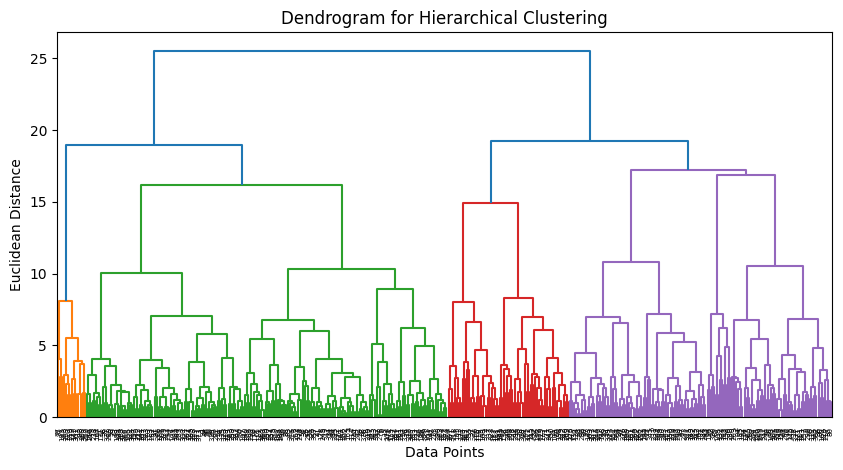

In [11]:
# Re-run full preprocessing before hierarchical clustering

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset (assuming it's already available in df)
# If df is not defined, we need to load the dataset from the user's file.

# Replace 0 values with NaN for certain columns
cols_to_replace = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Fill NaN values with median (since median is less affected by outliers)
df.fillna(df.median(), inplace=True)

# Selecting only relevant features for clustering
features = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Remove outliers using IQR method
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]
df_cleaned_scaled = scaler.fit_transform(df_cleaned[features])

# Perform hierarchical clustering using Ward's method
linked = linkage(df_cleaned_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


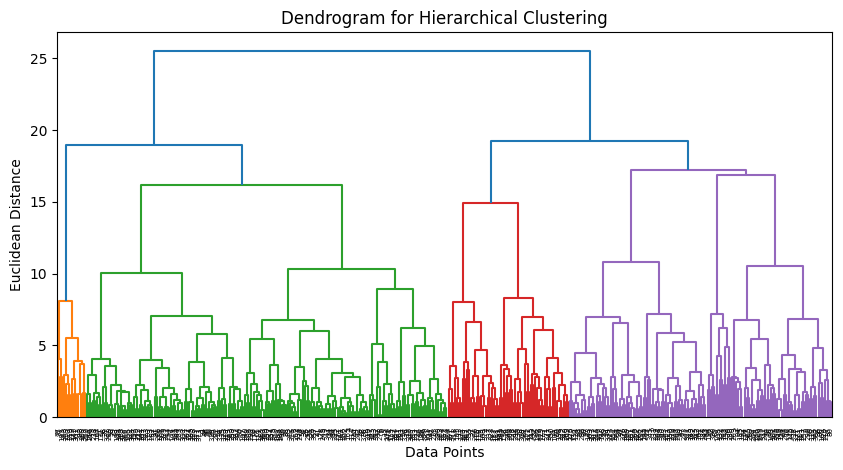

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using Ward's method
linked = linkage(df_cleaned_scaled, method='ward')

# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [20]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering (Agglomerative Clustering) with 3 clusters
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = hierarchical_model.fit_predict(df_cleaned_scaled)

# Add cluster labels to the dataset
df_cleaned['Cluster'] = cluster_labels

# Display the number of data points in each cluster
df_cleaned['Cluster'].value_counts()


<ipython-input-20-17d8a60c5da0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = cluster_labels


Cluster
0    190
1    128
2     59
Name: count, dtype: int64

In [22]:
# Apply Hierarchical Clustering (Agglomerative Clustering) with 3 clusters
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = hierarchical_model.fit_predict(df_cleaned_scaled)

# Add cluster labels to the dataset
df_cleaned['Cluster'] = cluster_labels

# Display the number of data points in each cluster
df_cleaned['Cluster'].value_counts()


<ipython-input-22-74f8c0d45f2c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = cluster_labels


Cluster
0    190
1    128
2     59
Name: count, dtype: int64

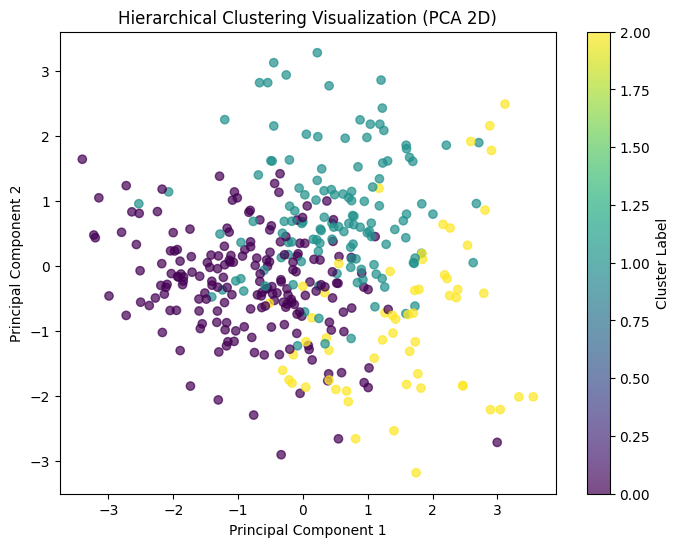

In [23]:
# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned_scaled)

# Create a scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title("Hierarchical Clustering Visualization (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


In [24]:
# Calculate mean values of features for each cluster
cluster_means = df_cleaned.groupby('Cluster')[features].mean()
cluster_means
#Cluster 0: Likely low-risk individuals, younger with lower glucose and BMI.
#Cluster 1: Older individuals with higher glucose and moderate BMI, possibly higher risk for diabetes.
#Cluster 2: Younger than Cluster 1 but with higher BMI, potentially at risk due to obesity.


glucose  diastolic    triceps     insulin        bmi       dpf  \
Cluster                                                                      
0        106.221053  70.442105  27.889474  124.400000  30.139474  0.317426   
1        133.710938  74.750000  27.906250  125.664062  31.047656  0.476211   
2        137.084746  77.661017  35.016949  125.203390  38.216949  0.427373   

               age  
Cluster             
0        28.463158  
1        43.906250  
2        34.000000